# Load in Data and Split into Train and Test Sets

In [1]:
import pickle

X = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np 

X_reshape = np.array(X).reshape((-1,224,224,3)) #100x100 images with 3 color channels

X_train, X_test, y_train, y_test = (train_test_split(X_reshape, y, 
                                                     test_size = .2, random_state = 42))

In [4]:
X_train.shape

(4136, 224, 224, 3)

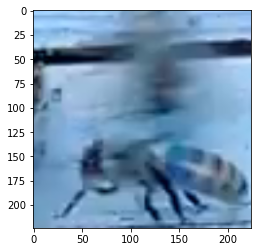

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1])

In [6]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build Sequential Neural Network 

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [8]:
base_model = Sequential()
base_model.add(InputLayer(input_shape=X_train.shape[1:]))

base_model.add(Flatten())
base_model.add(Dense(64, activation='relu'))

base_model.add(Dense(6, activation='softmax'))

base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                9633856   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 9,634,246
Trainable params: 9,634,246
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the network
base_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [10]:
base_history = base_model.fit(X_train, 
       y_train_cat, 
       epochs=4, 
       validation_split=0.25)

Epoch 1/4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-12-03 09:57:48.417802: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-03 09:57:48.419996: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


95/97 [============================>.] - ETA: 0s - loss: 10773599.0611 - accuracy: 0.5963WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x34fd80d30> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
97/97 [==============================] - 3s 29ms/step - loss: 10540285.2532 - accuracy: 0.5976 - val_loss: 1.5641 - val_accuracy: 0

In [11]:
# Evaluate
loss_and_metrics = base_model.evaluate(X_test, y_test_cat, batch_size=32)
print('\nLoss and Accuracy:\n', loss_and_metrics)

33/33 [==============================] - 0s 13ms/step - loss: 1.2496 - accuracy: 0.6541

Loss and Accuracy:
 [1.2496428489685059, 0.6541062593460083]


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

preds = np.argmax(base_model.predict(X_test), axis=-1)
print(round(recall_score(np.array(y_test), preds, average='weighted'),4))
print(round(accuracy_score(np.array(y_test), preds),4))

0.6541
0.6541


In [37]:
print(f1_score(np.array(y_test), preds, average='weighted'))

0.5173247099191837


In [13]:
import visualkeras

visualkeras.layered_view(base_model).show() # display using your system viewer
visualkeras.layered_view(base_model, to_file='basemodel_output.png') # write to disk
visualkeras.layered_view(base_model, to_file='basemodel_output.png').show() # write and show

visualkeras.layered_view(base_model)

In [14]:
model = Sequential()

model.add(InputLayer(input_shape=X_train.shape[1:]))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                11944000  
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
97/97 [==============================] - ETA: 0s - loss: 73.9816 - accuracy: 0.5388WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x176975e50> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY

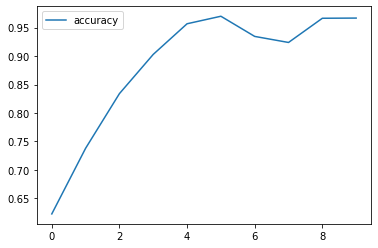

In [16]:
history = model.fit(X_train, 
       y_train_cat, 
       epochs=10, 
       validation_split=0.25)

plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

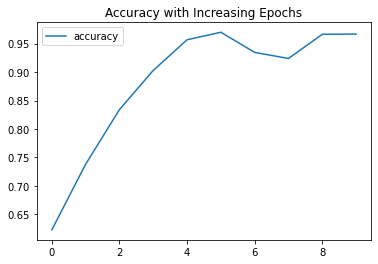

In [20]:
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])
plt.title('Accuracy with Increasing Epochs')
plt.savefig('accuracy_plot_cnn', transparent=True)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

preds = np.argmax(model.predict(X_test), axis=-1)
print(round(accuracy_score(np.array(y_test), preds),4))
print(f1_score(np.array(y_test), preds, average='weighted'))

0.7382
0.7102756508138359


In [21]:
print(confusion_matrix(np.array(y_test), preds))

[[  5  31   2   2   0   1]
 [ 19 641   5   7   0   5]
 [  4  52  39   0   0  19]
 [  1  48   3  33   0   0]
 [  0   7   0   0   0   0]
 [  2  31  31   1   0  46]]


In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm_plot_labels = ['Many Varroa', 'Missing Queen', 'Ants','Few Varroa', 'Healthy', 'Hive Theft']

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
for i in preds:
    round(i)

Confusion matrix, without normalization
[[  5  31   2   2   0   1]
 [ 19 641   5   7   0   5]
 [  4  52  39   0   0  19]
 [  1  48   3  33   0   0]
 [  0   7   0   0   0   0]
 [  2  31  31   1   0  46]]


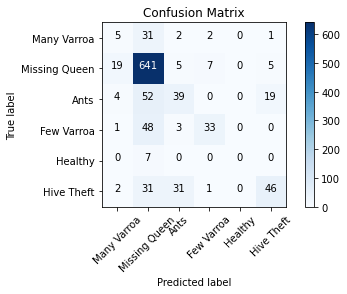

In [28]:
cm = confusion_matrix(y_true=y_test, y_pred=preds)

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

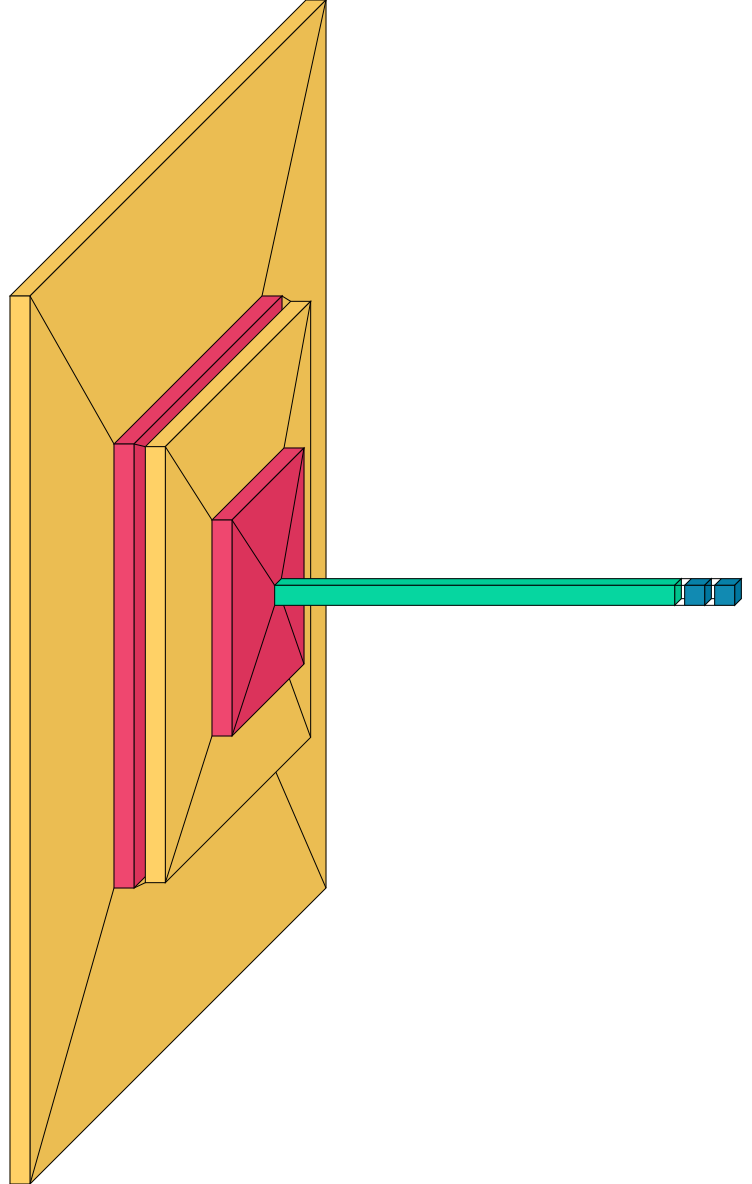

In [25]:
visualkeras.layered_view(model, legend=True).show() # display using your system viewer
visualkeras.layered_view(model, to_file='cnn_output.png') # write to disk
visualkeras.layered_view(model, to_file='cnn_output.png').show() # write and show

visualkeras.layered_view(model)

healthy


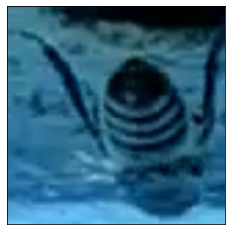

In [34]:
show_image(X[1])
print('healthy')

In [35]:
preds[1]

1